In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

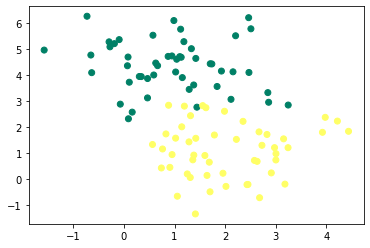

In [2]:
x,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape((y.shape[0],1))
plt.scatter(x[:,0],x[:,1],c=y,cmap='summer')


In [3]:
def initialisation(x):
    w=np.random.randn(x.shape[1],1)
    b=np.random.randn(1)
    return (w,b)

In [4]:
w, b =initialisation(x)
w

array([[1.90792976],
       [0.36518366]])

In [5]:
def model(x,w,b):
    z=x.dot(w)+b
    a=1/(1+np.exp(-z))
    return a

In [6]:
a=model(x,w,b)
a.shape

(100, 1)

In [7]:
def log_loss(a,y):
    return 1/len(y) * np.sum(-y*np.log(a)-(1-y)*np.log(1-a))

In [8]:
def gradients(a,x,y):
    dw =1/len(y) *np.dot(x.T,a-y)
    db =1/len(y)*np.sum(a-y)
    return (dw,db)

In [9]:
dw,db=gradients(a,x,y)
db.shape

()

In [10]:
def updates(dw,db,w,b,learning_rate):
    w=w-learning_rate*dw
    b=b-learning_rate*db
    return (w,b)

In [11]:

def predict(x,w,b):
    a=model(x,w,b)
    return a>=0.5

In [12]:
def artificialneuron(x,y,learning_rate=0.1,n_iter=100):
    w, b =initialisation(x)
    loss=[]
    for i in range(n_iter):
        a=model(x,w,b)
        loss.append(log_loss(a,y))
        dw,db=gradients(a,x,y)
        w,b=updates(dw,db,w,b,learning_rate)
    y_pred=predict(x,w,b)
    print(accuracy_score(y,y_pred))
    plt.plot(loss)
    plt.show()
    return(w,b)

0.92


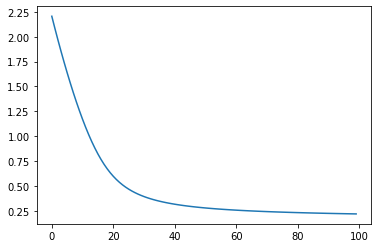

In [13]:
w,b=artificialneuron(x,y)

In [17]:
w,b

(array([[ 0.84615002],
        [-1.0567703 ]]),
 array([1.20834424]))

array([False])

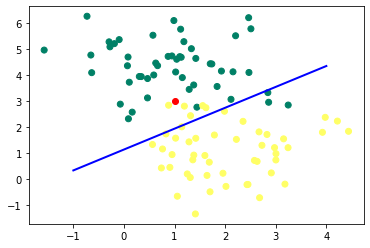

In [19]:
new_plant =np.array([1,3])

x0=np.linspace(-1,4,100)
x1=(-w[0]*x0-b)/w[1]

plt.scatter(x[:,0],x[:,1],c=y,cmap='summer')
plt.scatter(new_plant[0],new_plant[1],c='r')
plt.plot(x0,x1,c='b',lw=2)
predict(new_plant,w,b)

In [20]:
import ftx
import time
import pandas as pd
import ta

In [69]:
pairSymbol = 'ETH/USD'
fiatSymbol = 'USD'
cryptoSymbol = 'ETH'
myTruncate = 3
i = 9
j = 21
accountName = 'RAYROB'
goOn = True

client = ftx.FtxClient(
    api_key='uFsATrNMdGYEAKgg2HxXFzAWPep3aEHbY0NnaS0u',
    api_secret='ccEx9nZ1mSr_Y_26p-IcyG2eA0HC3zPRcmkxe4nM',
    subaccount_name=accountName
)
result = client.get_balances()

data = client.get_historical_data(
    market_name=pairSymbol,
    resolution=3600,
    limit=1000,
    start_time=float(round(time.time()))-150*3600*2,
    end_time=float(round(time.time()))-150*3600)
df = pd.DataFrame(data)
df

,startTime,time,open,high,low,close,volume
0,2022-01-26T06:00:00+00:00,1.643177e+12,2477.0,2486.4,2447.1,2452.3,1.268833e+07
1,2022-01-26T07:00:00+00:00,1.643180e+12,2452.3,2465.8,2446.1,2462.7,8.118651e+06
2,2022-01-26T08:00:00+00:00,1.643184e+12,2462.7,2494.4,2462.3,2488.9,1.853169e+07
3,2022-01-26T09:00:00+00:00,1.643188e+12,2488.9,2522.8,2483.3,2490.4,1.943172e+07
4,2022-01-26T10:00:00+00:00,1.643191e+12,2490.4,2540.0,2477.9,2527.3,1.995285e+07
...,...,...,...,...,...,...,...
145,2022-02-01T07:00:00+00:00,1.643699e+12,2734.9,2747.9,2734.2,2738.9,1.497891e+07
146,2022-02-01T08:00:00+00:00,1.643702e+12,2738.9,2767.2,2733.4,2765.9,1.008976e+07
147,2022-02-01T09:00:00+00:00,1.643706e+12,2765.9,2798.0,2730.0,2736.6,3.346374e+07
148,2022-02-01T10:00:00+00:00,1.643710e+12,2736.6,2746.4,2719.9,2737.6,1.532179e+07


<AxesSubplot:>

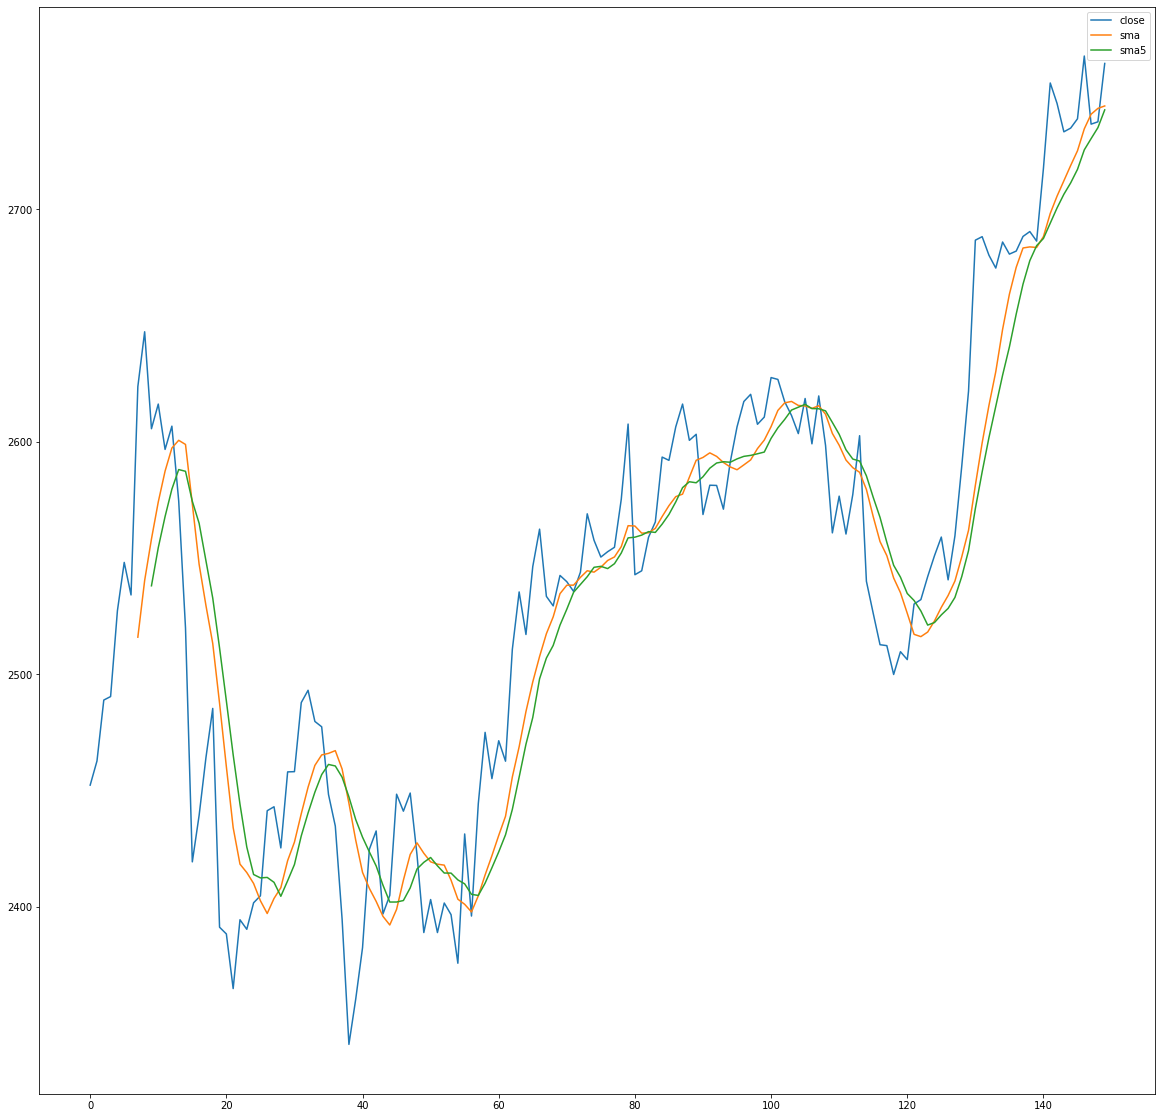

In [70]:
del df['volume']
del df['time']
del df['open']
del df['high']
del df['low']
df['sma']=ta.trend.sma_indicator(df['close'], 8)
df['sma5']=ta.trend.sma_indicator(df['close'], 10)
'''df['ema']=ta.trend.ema_indicator(close=df['close'], window=4)'''
df.plot(figsize=(20,20))

In [71]:
df['dist']=df['close']-df.mean(axis=0)['close']
df

/tmp/ipykernel_55391/3934475610.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['dist']=df['close']-df.mean(axis=0)['close']


,startTime,close,sma,sma5,dist
0,2022-01-26T06:00:00+00:00,2452.3,NaN,NaN,-89.160667
1,2022-01-26T07:00:00+00:00,2462.7,NaN,NaN,-78.760667
2,2022-01-26T08:00:00+00:00,2488.9,NaN,NaN,-52.560667
3,2022-01-26T09:00:00+00:00,2490.4,NaN,NaN,-51.060667
4,2022-01-26T10:00:00+00:00,2527.3,NaN,NaN,-14.160667
...,...,...,...,...,...
145,2022-02-01T07:00:00+00:00,2738.9,2725.1500,2717.15,197.439333
146,2022-02-01T08:00:00+00:00,2765.9,2734.5875,2725.54,224.439333
147,2022-02-01T09:00:00+00:00,2736.6,2740.8750,2730.37,195.139333
148,2022-02-01T10:00:00+00:00,2737.6,2743.3750,2735.09,196.139333


In [75]:
df['dif']=0
for i in range(1,df.shape[0]):
    df['dif'].iloc[i]=df['close'].iloc[i]-df['close'].iloc[i-1]
    
df


/home/rayan/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,startTime,close,sma,sma5,dist,dif
0,2022-01-26T06:00:00+00:00,2452.3,NaN,NaN,-89.160667,0.0
1,2022-01-26T07:00:00+00:00,2462.7,NaN,NaN,-78.760667,10.4
2,2022-01-26T08:00:00+00:00,2488.9,NaN,NaN,-52.560667,26.2
3,2022-01-26T09:00:00+00:00,2490.4,NaN,NaN,-51.060667,1.5
4,2022-01-26T10:00:00+00:00,2527.3,NaN,NaN,-14.160667,36.9
...,...,...,...,...,...,...
145,2022-02-01T07:00:00+00:00,2738.9,2725.1500,2717.15,197.439333,4.0
146,2022-02-01T08:00:00+00:00,2765.9,2734.5875,2725.54,224.439333,27.0
147,2022-02-01T09:00:00+00:00,2736.6,2740.8750,2730.37,195.139333,-29.3
148,2022-02-01T10:00:00+00:00,2737.6,2743.3750,2735.09,196.139333,1.0


In [78]:
dfa=np.zeros((df.shape[0],1))
for i in range(dfa.shape[0]):
    if df['dif'].iloc[i]>0:
        dfa[i,0]=1
    else:
        dfa[i,0]=0
dfa

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],

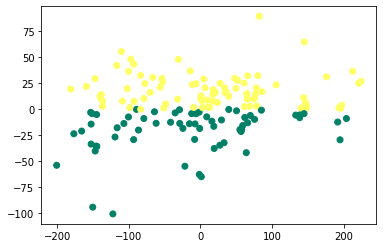

In [79]:
dfb=np.array(df)
plt.scatter(dfb[:,-2],dfb[:,-1],c=dfa,cmap='summer')

In [68]:
np.abs(df['dist']).mean()

149.26200888888886

In [ ]:
w,b=initialisation(dfa)
w,b

In [ ]:
model(dfa,w,b)